In [1]:
%reset -f
import glob, os, sys, io
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from wavhandler import *
from utils import *

import logging
logger = logging.getLogger()
logger.propagate = False
logger.setLevel(logging.ERROR)
np.random.seed(0)

In [2]:
df_mosquitos = pd.read_pickle('./data/mosquitos.pkl')

# Creating dataframes that contain PSDs for each insect class

In [3]:
sz = 2000
df_an = make_df_parallel(df_mosquitos, setting='psd', insect_class='Anopheles', sample_size=sz).T
df_an['label'] = 'an'
df_ae = make_df_parallel(df_mosquitos, setting='psd',insect_class='Aedes', sample_size=sz).T
df_ae['label'] = 'ae'
df_cu = make_df_parallel(df_mosquitos, setting='psd',insect_class='Culex', sample_size=sz).T
df_cu['label'] = 'cu'

/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child processes.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 10] No child p

In [4]:
df_concat = pd.concat([df_ae, df_an, df_cu], axis=0, sort=False)
print(df_concat.shape)
df_concat.dropna(how='all', axis=1, inplace=True)
df_concat.dropna(how='any', axis=0, inplace=True)
print(df_concat.shape)
df_concat.head()
labelarray = df_concat.label.values
df_concat.drop('label', axis=1, inplace=True)
print(labelarray.shape)

(6000, 130)
(6000, 130)
(6000,)


### Example PSD

In [5]:
# df_concat.iloc[9,:-1].plot()

# Principal Component Analysis

In [6]:
X = df_concat.iloc[:,:-1].values

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

idx = np.random.randint(X.shape[0], size=3000)
X = X[idx,:]
labelarray = labelarray[idx]
X_std = StandardScaler(with_std=False).fit_transform(X);  # standardization of data

ncomps = 3
pca = PCA(n_components=ncomps) # 10 to get 80% explained variance
Χ_final = pca.fit_transform(X_std)
print("EXPLAINED VARIANCE with {0:d} components: {1:.2f}".format(ncomps,pca.explained_variance_ratio_.sum()) )

EXPLAINED VARIANCE with 3 components: 0.44


## Plotting PCA scores (The first two components)

Text(0, 0.5, 'component 2')

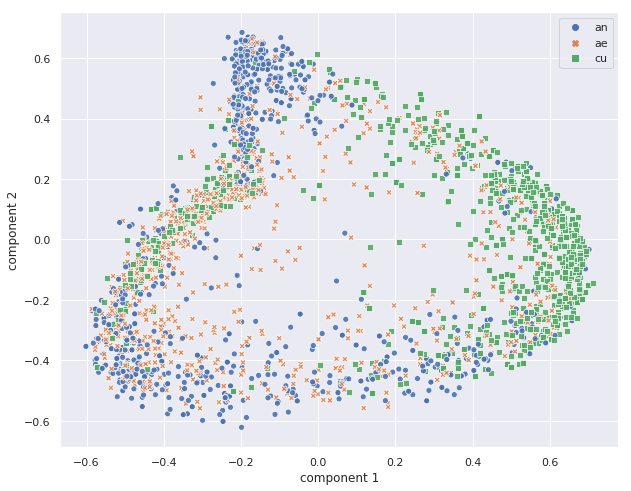

In [8]:


plt.figure(figsize=(10,8))
sns.scatterplot(Χ_final[:,0], Χ_final[:,1], hue=labelarray, style=labelarray, alpha=0.9)
plt.xlabel('component 1')
plt.ylabel('component 2')


In [9]:
df_pca = pd.DataFrame(pca.components_,index = ['PC-1','PC-2', 'PC-3'])
df_pca

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
PC-1,0.000108,0.000090,0.000243,0.001240,0.00157,0.001276,0.000792,0.000462,0.000286,0.000547,...,-2.249162e-08,-2.141452e-08,-2.035047e-08,-1.961445e-08,-1.894606e-08,-1.841633e-08,-1.795745e-08,-1.762299e-08,-1.737676e-08,-1.723212e-08
PC-2,-0.000053,-0.000037,-0.000013,-0.000268,-0.00009,0.000203,0.000348,0.000312,0.000323,0.000531,...,3.906300e-08,3.791124e-08,3.711413e-08,3.607426e-08,3.565104e-08,3.506776e-08,3.462215e-08,3.429623e-08,3.406277e-08,3.392189e-08
PC-3,0.000026,0.000024,0.000084,0.000529,0.00056,0.000171,0.000001,-0.000066,-0.000114,-0.000036,...,1.380094e-08,1.403966e-08,1.409841e-08,1.439962e-08,1.446920e-08,1.447438e-08,1.458889e-08,1.461547e-08,1.465168e-08,1.467167e-08


In [10]:
pca.components_.shape

(3, 128)

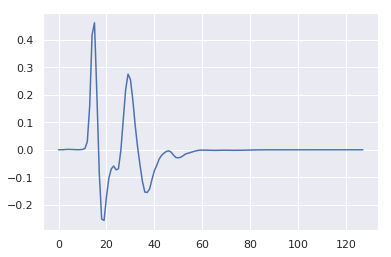

In [11]:
df_pca.loc['PC-1'].plot()

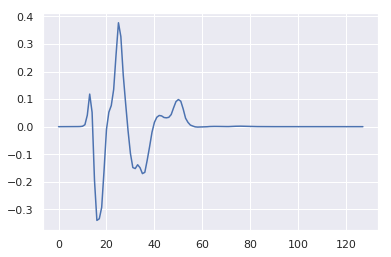

In [12]:
df_pca.loc['PC-2'].plot()

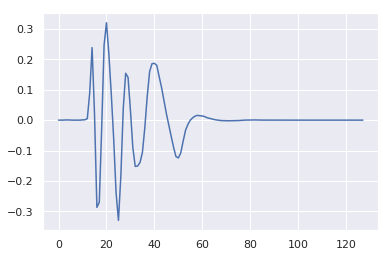

In [13]:
df_pca.loc['PC-3'].plot()

# 3D Plot (PCA scores, 3 components)

In [14]:
import plotly
import plotly.plotly as py
from sklearn.preprocessing import LabelEncoder
plotly.tools.set_credentials_file(username='kalfasyan', api_key='oOr9ILFmszXQYREloJTp')

import plotly.graph_objs as go

import numpy as np

x, y, z = Χ_final[:,0], Χ_final[:,1], Χ_final[:,2]
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=4,
        line=dict(
            color=LabelEncoder().fit(['cu','an','ae']).transform(labelarray),#'rgba(217, 217, 217, 0.14)',
            colorscale='Portland',
            width=0.5
        ),
        opacity=0.7
    )
)


data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

/home/yannis/.virtualenvs/wingbeat_frequencies/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(Χ_final)


import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='kalfasyan', api_key='oOr9ILFmszXQYREloJTp')

import plotly.graph_objs as go

import numpy as np

x, y, z = Χ_final[:,0], Χ_final[:,1], Χ_final[:,2]
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=1,
        line=dict(
            color=kmeans.labels_,#'rgba(217, 217, 217, 0.14)',
            colorscale='Viridis',
            width=0.5
        ),
        opacity=0.9
    )
)


data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

# Edw eisai

In [ ]:
df_an = df_an.transpose()
df_an.shape

In [ ]:
df_an['kmeans'] = kmeans.labels_

In [ ]:
df_an.sample(10)

In [ ]:
import pickle

def save_obj(obj, name ):
    with open('./data/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('./data/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
save_obj(df_an['kmeans'].to_dict(), 'df_an_clusters')